In [49]:
import pandas as pd

# Reading the data
train_data = pd.read_csv('C:/Users/payel/Desktop/Data Analysis/train.csv')

In [50]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [52]:
train_data.describe() #to get a statistical summary of the variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [54]:
                       titanic_train["Fare"].plot(kind="box",
                           figsize=(9,9))#since many "Age" column have missing values (NaN) , we need to fill them 
train_data.Age = train_data.Age.fillna(train_data.Age.mean())
train_data.describe()

#we can see the count of Age has increased to 819 from 714

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
#to get a summary of the categorical variables by passing only those columns to describe()
category_data = train_data.dtypes[train_data.dtypes == "object"].index


train_data[category_data].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [56]:
                                #Not all variables are required to predict the survival

#dropping off column - Name

train_data = train_data.drop('Name', axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#We can do analysis on - Fare, Sex, Pclass, Family Status, Age ,Embarkment

In [58]:
#Fare Analysis 
fare_df = train_data[['Survived', 'Pclass','Fare']]
fare_df.head()

,Survived,Pclass,Fare
0,0,3,7.2500
1,1,1,71.2833
2,1,3,7.9250
3,1,1,53.1000
4,0,3,8.0500


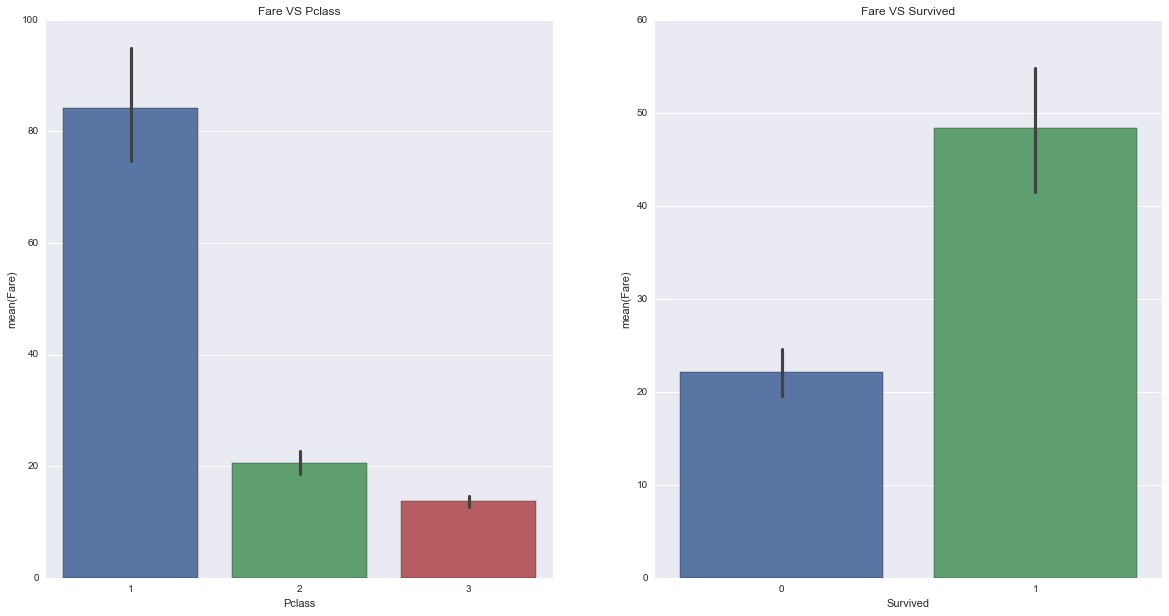

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

fig,(axis1,axis2) = plt.subplots(1,2,figsize=(20,10))
axis1.set_title('Fare VS Pclass')   #Pclass is of 3 types - 1, 2 ,3
axis2.set_title('Fare VS Survived') #survived is of 2 types - 0 , 1

sns.barplot(x='Pclass', y='Fare', data = fare_df, ax=axis1)
sns.barplot(x='Survived', y='Fare', data = fare_df, ax=axis2)

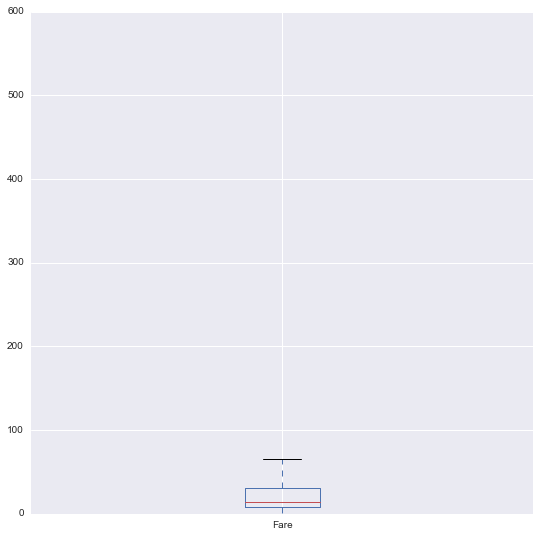

In [63]:
train_data["Fare"].plot(kind="box",
                           figsize=(9,9))

In [13]:
#in the above output , we can see that Passenger class 3 has the least fare than 1 or 2 import

In [14]:
#Sex Analysis 
gender_df = train_data[['Survived', 'Pclass','Fare', 'Sex']]
gender_df.head()

,Survived,Pclass,Fare,Sex
0,0,3,7.2500,male
1,1,1,71.2833,female
2,1,3,7.9250,female
3,1,1,53.1000,female
4,0,3,8.0500,male


In [15]:
#let's first convert the gender into binary values :- Male for 0 and female for 1

df = train_data.replace(to_replace='male',value=0 ).replace(to_replace='female',value=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,1,14.000000,1,0,237736,30.0708,NaN,C


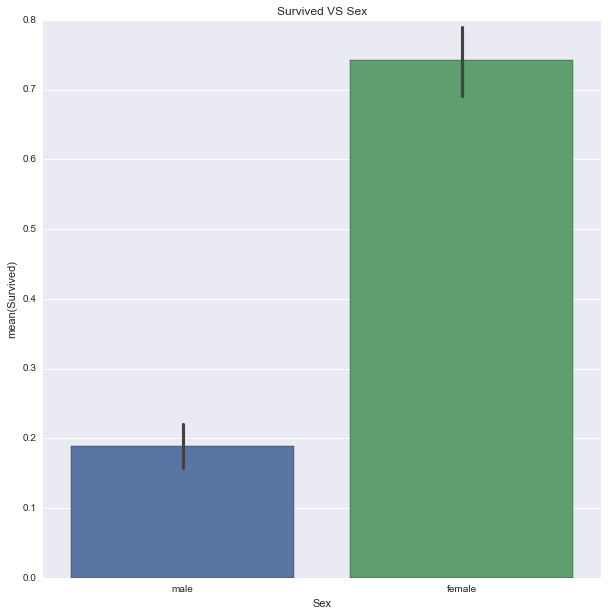

In [22]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Sex')   


sns.barplot(x='Sex', y='Survived', data = gender_df, ax=axis1)

In [23]:
#Pclass Analysisfig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Pclass')   


sns.barplot(x='Pclass', y='Survived', data = pclass_df, ax=axis1)
pclass_df = train_data[['Survived', 'Pclass','Fare', 'Sex']]
pclass_df.head()

,Survived,Pclass,Fare,Sex
0,0,3,7.2500,male
1,1,1,71.2833,female
2,1,3,7.9250,female
3,1,1,53.1000,female
4,0,3,8.0500,male


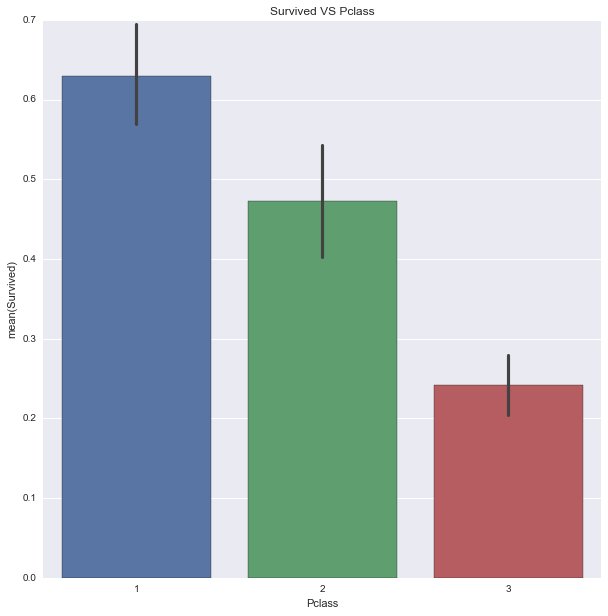

In [24]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Pclass')   


sns.barplot(x='Pclass', y='Survived', data = pclass_df, ax=axis1)parch_df.tail()

In [17]:
#Family status 
#parch : no. of parents / children aboard the Titanic
parch_df = train_data[['Survived', 'Pclass','Fare', 'Sex', 'Parch']]
parch_df.head()

,Survived,Pclass,Fare,Sex,Parch
0,0,3,7.2500,male,0
1,1,1,71.2833,female,0
2,1,3,7.9250,female,0
3,1,1,53.1000,female,0
4,0,3,8.0500,male,0


In [25]:
parch_df.tail()

,Survived,Pclass,Fare,Sex,Parch
886,0,2,13.00,male,0
887,1,1,30.00,female,0
888,0,3,23.45,female,2
889,1,1,30.00,male,0
890,0,3,7.75,male,0


In [26]:
#since Parch and SibSp has many different values so, we can't plot them on the graph directly in X-axis 

#We need to do Feature Engineering here,to create a new feature called "With_Family" 
#which would contain information on both chilren and spouses.

df['With_Family'] = (df['Parch'].astype(bool) | df['SibSp'].astype(bool)).astype(int)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,With_Family
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [75]:
train_data["Family"] = train_data["SibSp"] + train_data["Parch"]
most_mem = np.where(train_data["Family"] == max(train_data["Family"]))

train_data.ix[most_mem]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,3,male,29.699118,8,2,CA. 2343,69.55,NaN,S,10
180,181,0,3,female,29.699118,8,2,CA. 2343,69.55,NaN,S,10
201,202,0,3,male,29.699118,8,2,CA. 2343,69.55,NaN,S,10
324,325,0,3,male,29.699118,8,2,CA. 2343,69.55,NaN,S,10
792,793,0,3,female,29.699118,8,2,CA. 2343,69.55,NaN,S,10
846,847,0,3,male,29.699118,8,2,CA. 2343,69.55,NaN,S,10
863,864,0,3,female,29.699118,8,2,CA. 2343,69.55,NaN,S,10


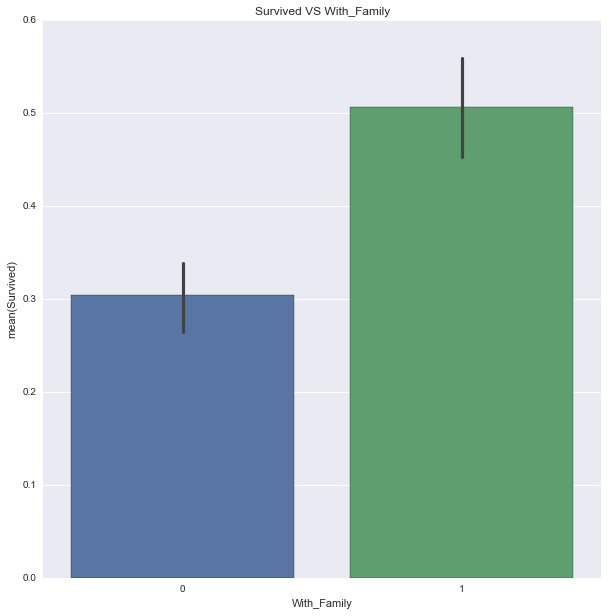

In [27]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS With_Family')   


sns.barplot(x='With_Family', y='Survived', data = df, ax=axis1)

In [18]:
#Age analysis 
age_df = train_data[['Survived', 'Pclass','Fare', 'Sex', 'Age']]
age_df.head()

,Survived,Pclass,Fare,Sex,Age
0,0,3,7.2500,male,22.0
1,1,1,71.2833,female,38.0
2,1,3,7.9250,female,26.0
3,1,1,53.1000,female,35.0
4,0,3,8.0500,male,35.0


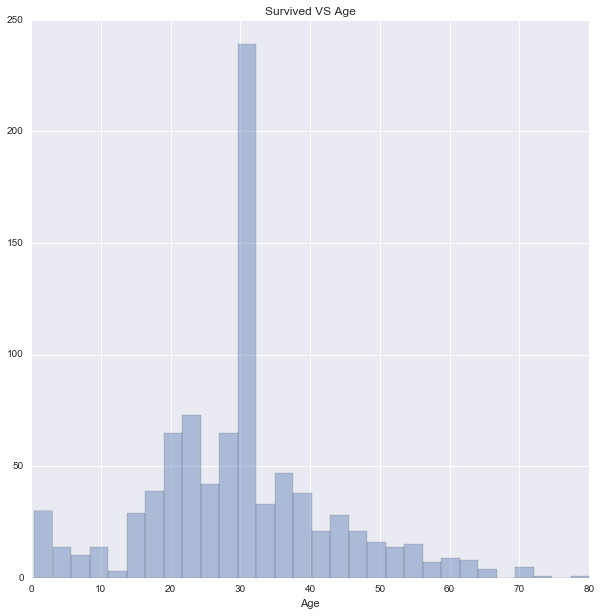

In [28]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Age')   


sns.distplot(age_df.Age, label='Survived', hist=True, kde=False)

In [64]:
#Outliers are extreme numerical values which lie far away from the typical values a variable takes on. 
# We can see that ages near 80 are uncommon for this data set, but in looking at the general shape of the data seeing one or two 80 year olds doesn't seem particularly surprising.

In [65]:
#Embarkment analysis 
embarked_df = train_data[['Survived', 'Pclass','Fare', 'Sex', 'Age', 'Embarked']]
embarked_df.head()  # Embarkement is of 3 types - C = Cherbourg, Q = Queenstown, S = Southampton


,Survived,Pclass,Fare,Sex,Age,Embarked
0,0,3,7.2500,male,22.0,S
1,1,1,71.2833,female,38.0,C
2,1,3,7.9250,female,26.0,S
3,1,1,53.1000,female,35.0,S
4,0,3,8.0500,male,35.0,S


In [66]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

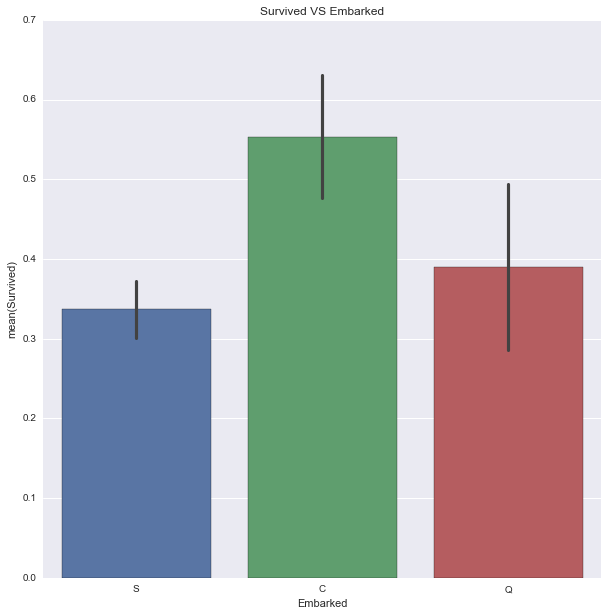

In [67]:
fig,axis1 = plt.subplots(1,figsize=(10,10))
axis1.set_title('Survived VS Embarked')   


sns.barplot(x='Embarked', y='Survived', data = embarked_df, ax=axis1)

In [68]:
#We can transform some variables from indicator variables to categorical variables 




In [69]:
# Pclass is an integer that indicates a passenger's class, with 1 being first class, 2 being second class and 3 being third class. 
#What if 1st class would be considered "higher" than 2nd class, but when encoded as an integer, 1 comes before 2. 
#We can fix this by transforming Pclass into an ordered categorical variable:

In [70]:
new_pclass = pd.Categorical(train_data["Pclass"],ordered=True)

new_pclass = new_pclass.rename_categories(["Class1","Class2","Class3"])     

new_pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [71]:
import numpy as np
cabin_char = train_data["Cabin"].astype(str) # Convert data to str
new_cabin = np.array([cabin[0] for cabin in cabin_char]) # Take first letter

new_cabin = pd.Categorical(new_cabin)




In [46]:

new_cabin .describe()


,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044
